In [3]:
#
# libraries
#
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#

In [35]:
#
# utility function for plotting histograms in a grid
#
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
#
# for some variables there are relatively few unique values, so we'll
# adjust the histogram appearance accordingly to avoid "gaps" in the plots
#    
        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins
#      
        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

In [59]:
#
# load and prepare data
#
weather_data = pd.read_csv('Datasets\\austin_weather.csv')
#
# drop the Date column as we will consider this a classification problem
#
weather_data.drop(columns = ['Date'], inplace = True)
#
# replace the ' ' with 'None'
#
weather_data['Events'] = ['None' 
                          if weather_data['Events'][i] is ' '
                         else weather_data['Events'][i]
                         for i in range(weather_data.shape[0])]
#
weather_data.describe().T
#

,count,mean,std,min,25%,50%,75%,max
TempHighF,1319.0,80.862775,14.766523,32.0,72.0,83.0,92.0,107.0
TempAvgF,1319.0,70.642911,14.045904,29.0,62.0,73.0,83.0,93.0
TempLowF,1319.0,59.902957,14.190648,19.0,49.0,63.0,73.0,81.0


In [60]:
#
# it appears some of our data were read as strings
# this is caused by the use of - for missing or negligible, and T for 'trace' in the data
# we can replace those and convert to float
#
weather_data.iloc[:, :-1] = weather_data.iloc[:, :-1].replace(['-', 'T'], [np.nan, 0]).astype(float)
na_rows = list(weather_data.loc[weather_data.isnull().any(axis = 1), :].index)
print('the following rows have NA data\n', na_rows)
#

the following rows have NA data
 [174, 175, 176, 177, 596, 597, 598, 638, 639, 741, 742, 953, 1001, 1107]


                             count       mean        std    min    25%    50%  \
TempHighF                   1305.0  80.792337  14.710570  32.00  72.00  83.00   
TempAvgF                    1305.0  70.557854  14.009579  29.00  62.00  73.00   
TempLowF                    1305.0  59.819923  14.193089  19.00  49.00  62.00   
DewPointHighF               1305.0  61.516475  13.578896  13.00  53.00  66.00   
DewPointAvgF                1305.0  56.636782  14.862556   8.00  46.00  61.00   
DewPointLowF                1305.0  50.944061  16.187999   2.00  38.00  56.00   
HumidityHighPercent         1305.0  87.833716  11.049003  37.00  85.00  90.00   
HumidityAvgPercent          1305.0  66.662835  12.503302  27.00  59.00  67.00   
HumidityLowPercent          1305.0  44.983908  17.013137  10.00  33.00  44.00   
SeaLevelPressureHighInches  1305.0  30.112337   0.179948  29.63  29.99  30.08   
SeaLevelPressureAvgInches   1305.0  30.022835   0.171879  29.55  29.91  30.00   
SeaLevelPressureLowInches   

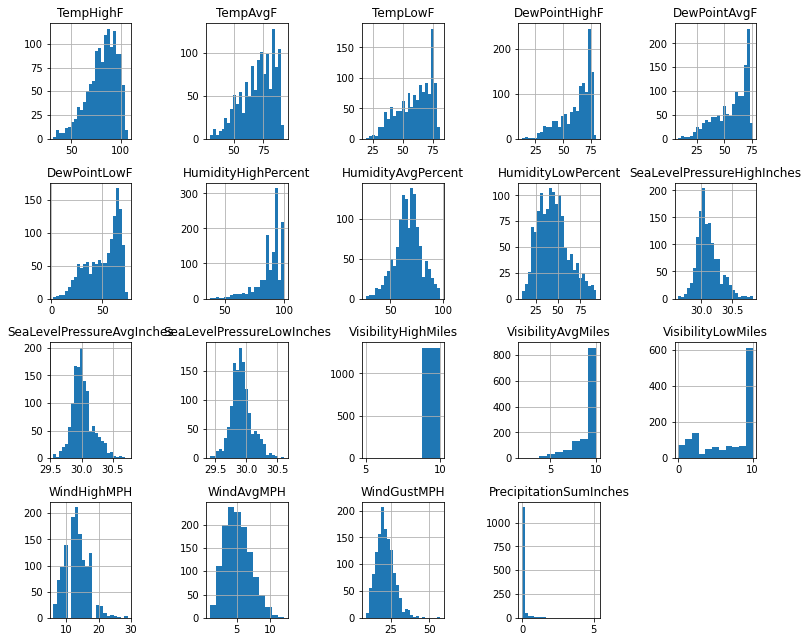

In [61]:
#
# there aren't may rows with missing values now
# let's drop them then we are ready for scaling
#
weather_data.drop(na_rows, axis = 0, inplace = True)
#
# now inspect the results before scaling
#
print(weather_data.describe().T)
plot_histogram_grid(weather_data.iloc[:, :-1], weather_data.iloc[:, :-1].columns, 5, 5, 25)
#

In [62]:
#
# scale all the numeric columns using StandardScaler
#
# create an instance of the scaler
#
scaler = StandardScaler()
#
# fit the scaler to our data
#
scaler = scaler.fit(weather_data.iloc[:, :-1])
scaled_weather = pd.DataFrame(scaler.transform(weather_data.iloc[:, :-1]))
scaled_weather.columns = weather_data.columns[:-1]
scaled_weather.head()
#

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,-0.461909,-0.753906,-1.044565,0.403982,-0.514024,-0.490926,0.467758,0.667053,0.706554,-1.402816,-1.995400,-1.987777,0.051538,-1.482245,-1.316382,1.972648,-0.484935,1.633850,0.800964
1,-1.685988,-1.610791,-1.467468,-1.364144,-1.389041,-1.417893,0.467758,0.106986,-0.116655,1.654795,0.623730,-0.358495,0.051538,0.574094,-0.500934,0.804500,0.476098,0.614403,-0.268449
2,-1.549979,-1.825012,-1.960855,-2.248207,-1.994821,-1.726883,-1.071432,-1.173167,-1.057465,2.488689,2.719034,2.783690,0.051538,0.574094,0.858148,-1.531795,-0.965452,-1.594400,-0.268449
3,-1.345966,-1.753605,-2.031339,-1.879848,-1.927512,-1.850478,0.105596,-0.853129,-1.351469,2.488689,2.486223,2.143615,0.051538,0.574094,0.042699,-0.363648,-0.484935,-0.235137,-0.268449
4,-1.549979,-1.467977,-1.326500,-1.290472,-1.119805,-0.923511,-0.166026,0.347015,0.647753,1.654795,1.787788,1.969049,0.051538,0.574094,0.042699,-0.947721,-1.445968,-0.914769,-0.268449
